In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
data = pd.read_csv("housing.csv")

In [108]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [110]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [111]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15780,-122.41,37.77,52.0,361.0,76.0,168.0,55.0,3.2292,NEAR BAY,275000.0
18499,-121.74,37.35,34.0,440.0,90.0,217.0,93.0,5.2327,<1H OCEAN,500001.0
5002,-118.32,34.01,52.0,3104.0,645.0,1498.0,581.0,2.6667,<1H OCEAN,128000.0
11594,-118.08,33.80,29.0,3675.0,613.0,1457.0,591.0,6.0553,<1H OCEAN,369400.0
7779,-118.07,33.91,29.0,2387.0,570.0,1978.0,548.0,3.1957,<1H OCEAN,159200.0
...,...,...,...,...,...,...,...,...,...,...
12525,-121.48,38.56,46.0,1476.0,344.0,688.0,353.0,2.7316,INLAND,134700.0
9033,-118.66,34.02,23.0,8798.0,1465.0,2750.0,1208.0,8.7364,NEAR OCEAN,500001.0
16997,-122.27,37.54,5.0,2140.0,420.0,990.0,394.0,6.0350,NEAR BAY,438800.0
13568,-117.28,34.15,32.0,2170.0,430.0,815.0,401.0,3.1765,INLAND,135000.0


In [112]:
train_data = X_train.join(y_train) # the result of this only shows the result of the training data



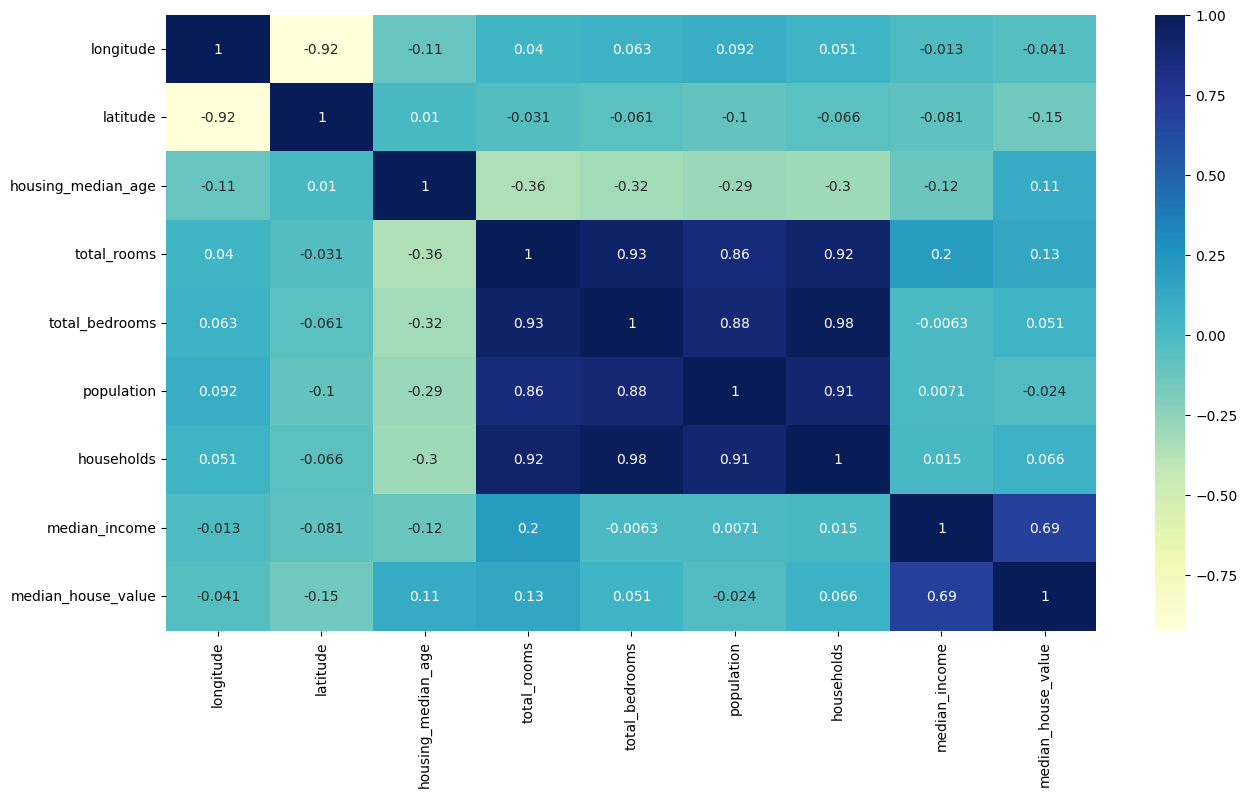

In [113]:
train_data_numeric = train_data.drop(columns=['ocean_proximity'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="YlGnBu")
plt.show()